# Example of running Sensitivity Analysis (SA) on domain models using the SALib package

### The goal of SA is to examine the impact of each independent variable on the outcome of the model. A common approach for SA is variance-based methods, which doesn't assume linearity in the response/output of the model. Variance-based algorithms measure sensitivity by apportioning variance of the output to a given input.

### The Sobol method is an emulator that approximates the output behavior given the input space, and it's model agnostic. By sampling the input variables a number of times (i.e, n=1000), the emulator can fit an estimated function within a margin of error.  
 - #### In determining the sensitivty index of a variable, the Sobol method from SALib returns first order index, second order index, as well as total effect index. First order index is the measured sensitivity from a single independent variable, while second order index is the sensitivity from interactions between two variables. The total effect index (ST) is the sum that includes sensitivity from higher-order interaction (more than 2 variables).
 
##### The full documentation can be found at this link:https://salib.readthedocs.io/en/latest/basics.html

In [1]:
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami
import numpy as np
import calendar
import pandas as pd
from sklearn.externals import joblib
import matplotlib.pyplot as plt
import seaborn as sns


### This example is based on the malnutrition model

In [2]:
# Define the model input space
problem = {
    'num_vars': 7,
    'names': ['NDVI', 'Population', 'CPI','crop_per_capita','CHIRPS(mm)_lag3','med_exp','month_int'],
    'bounds': [[-1.80, 2.10],
               [-1.40, 3.85],
               [-6.60, 3.0],
               [-1.00, 3.00],
               [-8.85, 2.60],
               [-1.5, 2.30],               
               [1, 12]],}


In [3]:
# Generate samples
param_values = saltelli.sample(problem, 5000)
param_values[:,-1]=np.round(param_values[:,-1])
month_int=param_values[:,-1].astype(int)

In [4]:
# convert month integer values to abbr. string
month_ls=[]
for month_val in month_int:
    month_ls.append(calendar.month_abbr[month_val])

In [5]:
month_dummies=pd.get_dummies(month_ls).reset_index(drop=True)
month_dummies.head()

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [6]:
inference_df=np.concatenate((param_values[:,:-1], month_dummies.values), axis=1)

## Load the pretrained model to run Sensitivity Analysis

In [7]:
gb_gam=joblib.load('maln_gb_model(gam)_v2.sav')
svm_gam=joblib.load('maln_svm_model(gam)_v2.sav')
gb_sam=joblib.load('maln_gb_model(sam)_v2.sav')
svm_sam=joblib.load('maln_svm_model(sam)_v2.sav')

/home/kimetrica/anaconda3/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/kimetrica/anaconda3/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/kimetrica/anaconda3/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/kimetrica/anaconda3/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.20.2 when using ve

/home/kimetrica/anaconda3/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/kimetrica/anaconda3/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/kimetrica/anaconda3/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/kimetrica/anaconda3/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.20.2 when using ve

/home/kimetrica/anaconda3/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/kimetrica/anaconda3/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/kimetrica/anaconda3/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/kimetrica/anaconda3/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.20.2 when using ve

In [8]:
predicted_gb_gam=gb_gam.predict(inference_df)
predicted_svm_gam=svm_gam.predict(inference_df)
ensemble_pred_gam=np.mean((predicted_svm_gam,predicted_gb_gam), axis=0)

#### This is the contribution to the output variance of the main effect of Xi, therefore it measures the effect of varying Xi alone, but averaged over variations in other input parameters. It is standardized by the total variance to provide a fractional contribution. ST is total Sobol index, which measures the contribution to the output variance of Xi, including all variance caused by its interactions,

In [10]:
Si = sobol.analyze(problem, ensemble_pred_gam)

#### In theory the indices cannot be negative. When this happens, it's for numerical reasons. Usually one of two things is responsible:
 - ##### Too small of a sample size, and if you ran more it would all work out. 
 - ##### Or, the indices have converged, but some of them are numerically zero. For the negative values, check to see whether their confidence intervals include zero-- if so, you can safely treat them as zero.

In [11]:
sobol_df=pd.DataFrame({'Sensitivity_idx':Si['S1'].tolist()+Si['ST'].tolist(),
              'Input_variable': ['NDVI', 'Population', 'CPI','crop_per_capita','CHIRPS(mm)_lag3','med_exp','month_int',
              'NDVI', 'Population', 'CPI','crop_per_capita','CHIRPS(mm)_lag3','med_exp','month_int'],
              'Order':['first order']*len(Si['S1'])+['total effect']*len(Si['ST']),
              'CI': Si['S1_conf'].tolist()+Si['ST_conf'].tolist(),
              })

sobol_df.dtypes

Sensitivity_idx    float64
Input_variable      object
Order               object
CI                 float64
dtype: object

In [12]:
def grouped_barplot_v(df, cat,subcat, val , err):
    plt.figure(figsize=(10,8))
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{} {}".format(subcat, gr), yerr=dfg[err].values, capsize=0.4)
        
    plt.xlabel(cat)
    plt.ylabel(val)
    plt.xticks(x, u)
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()


In [14]:
def grouped_barplot_h(df, cat,subcat, val , err):
    plt.figure(figsize=(10,8))
    u = df[cat].unique()
    y = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    height= np.diff(offsets).mean()
    for i,gr in enumerate(subx):
        dfg = df[df[subcat] == gr]
        plt.barh(y+offsets[i], dfg[val], height=height,
                label="{} {}".format(subcat, gr), xerr=dfg[err].values, capsize=0.2)
        
    plt.ylabel(cat)
    plt.xlabel(val)
    plt.yticks(y, u)
    plt.legend()
    plt.show()

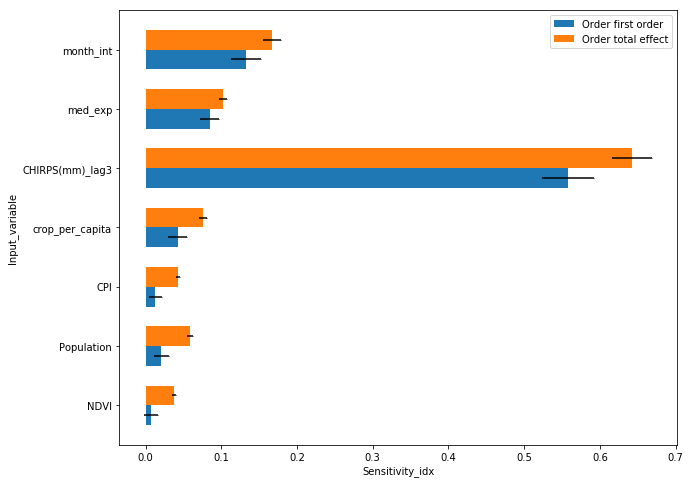

In [15]:
cat = "Input_variable"
subcat = "Order"
val = "Sensitivity_idx"
err = "CI"
grouped_barplot_h(sobol_df, cat, subcat, val, err )